In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

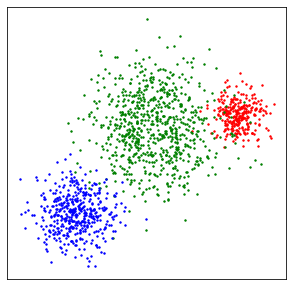

In [2]:
## Case Three : Unequal variance and Unequal size
mu1 = np.array([1.5,0.5])
mu2 = np.array([0.2,0.3])
mu3 = np.array([-1,-1])
sigma = 0.1
sigma1 = 2*sigma
sigma2 = 5*sigma
sigma3 = 3*sigma
n_samples = 1500
K = 3
n_subset = n_samples / K
n_subset1 = int(sigma1/(sigma1+sigma2+sigma3)*n_samples)
n_subset2 = int(sigma2/(sigma1+sigma2+sigma3)*n_samples)
n_subset3 = int(sigma3/(sigma1+sigma2+sigma3)*n_samples)

x31 = np.random.normal(loc = 0, scale = sigma1,size = (n_subset1,2)) + mu1
x32 = np.random.normal(loc = 0, scale = sigma2,size = (n_subset2,2)) + mu2
x33 = np.random.normal(loc = 0, scale = sigma3,size = (n_subset3,2)) + mu3

dataset3 = np.r_[x31,x32,x33]


fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x31[:,0],x31[:,1],color="red",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="green",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="blue",s = 2)

In [6]:
class myAgglometative():
    '''复现层次聚类代码

    
    '''
    labels_ : []
    
    def __init__(self, n_clusters=3, metric=None, linkage='complete') -> None:
        self.n_clusters = n_clusters
        self.metric = metric if metric else 'euclidean'
        self.linkage = linkage
        self.C = []
    
    def _euclidean(self, x1, x2) -> float:
        '''计算两点之间的欧氏距离

        参数
        -------------------
        x1 : ndarray of shape (n_features, )
            第一个点

        x2 : ndarray of shape (n_features, )
            第二个点

        返回
        -------------------
        dist : float
            欧氏距离
        '''
        return np.sum((x1 - x2) ** 2)
    
    def fit(self, X):
        '''训练数据集

        参数
        -------------------
        X : ndarray of shape (n_samples, n_features)
            输入数据点
        
        返回
        -------------------
        self : object
            返回类对象
        '''

        n_samples, n_features = X.shape

        self.C = [{i} for i in range(n_samples)]  # 初始化只有一个点的类

        M = np.empty((n_samples, n_samples))
        # 计算得到距离矩阵
        if self.metric == 'euclidean':
            for i in range(n_samples):
                for j in range(i, n_samples):
                    M[i][j] = self._euclidean(X[i], X[j])
                    M[j][i] = M[i][j]
        

        # 设置当前聚类数
        q = n_samples

        while q > self.n_clusters:
            classes = M.shape[0]
            # 找最近的两个类
            min_dist = 999999
            min_i = -1
            min_j = -1

            for i in range(classes-1):
                for j in range(i+1, classes):
                    if M[i][j] < min_dist:
                        min_dist = M[i][j]
                        min_i = i
                        min_j = j

            # 合并这两类
            self.C[min_i] = self.C[min_i].union(self.C[min_j])
            del self.C[min_j]
            # 更新距离
            for j in range(classes):
                if self.linkage == 'complete':
                    M[min_i][j] = max(M[min_i][j], M[min_j][j])
                    M[j][min_i] = M[min_i][j]
                elif self.linkage == 'single':
                    M[min_i][j] = min(M[min_i][j], M[min_j][j])
                    M[j][min_i] = M[min_i][j]

            # 删除距离矩阵中的对应行和列
            M = np.delete(M, min_j, axis=0)
            M = np.delete(M, min_j, axis=1)

            q -= 1
        
        self.labels_ = [-1 for i in range(n_samples)]
        for i in range(len(self.C)):
            for j in self.C[i]:
                self.labels_[j] = i

        return self
    


In [7]:
model = myAgglometative()

model.fit(dataset3)

print(model.labels_)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 

[]

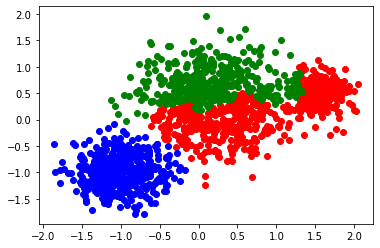

In [9]:
result = np.array(model.labels_)

color = ["red", "green", "blue"]
for i in range(K):
    plt.scatter(dataset3[result == i][:, 0], dataset3[result == i][:, 1], color=color[i])
plt.plot()

In [18]:
model_true = AgglomerativeClustering(n_clusters=3, linkage='complete')

labels = model_true.fit_predict(dataset3)

# result_true = np.array(model.labels_)
result_true = np.array(labels)

[]

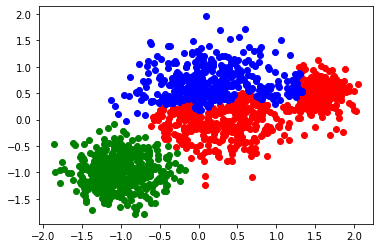

In [19]:
color = ["red", "green", "blue"]
for i in range(K):
    plt.scatter(dataset3[result_true == i][:, 0], dataset3[result_true == i][:, 1], color=color[i])
plt.plot()